#### Author : Amine KHELDOUNI 

In [310]:
# Importation des modules
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as ln
import math as m

%matplotlib inline
plt.ion()

# 1. Données artificielles et réelles

In [313]:
#Question 1.1.1
def gen_linear(a, b, eps, nbex, d):
    X = np.random.uniform(-5, 5, (nbex, d))
    e = eps**(0.5) * np.random.randn(nbex, 1)
    U = np.random.uniform(b, b, (nbex, 1))
    a = np.reshape(a, (a.shape[0], 1))
    Y = X.dot(a) + U + e
    return (X,Y)
    

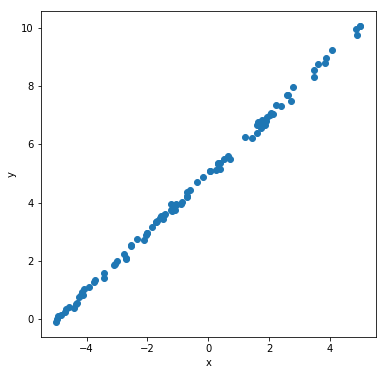

In [314]:
#Question 1.1.2
a = np.array([1])
d = 1
b = 5
eps = 0.01
nbex = 100
plt.figure(figsize=(6, 6))
(x, y) = gen_linear(a, b, eps, nbex, d)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

In [312]:
#Question 1.1.3
a = np.array([1, 1, 1])
d = a.shape[0]
b = 5
eps = 0.01
nbex = 1000
(x, y) = gen_linear(a, b, eps, nbex, d)

In [294]:
#Question 1.2.1
def read_file(fn):
    with open(fn) as f :
        names = f.readline()
        X = np.array([[float(x) for x in l.strip().split(" ")] \
                      for l in f.readlines()])
    return X[:,:-1], X [: , -1].reshape(-1)

In [295]:
# Génération des couples de variables (i, j) pour la représentation 
#du nuage de points :
fn = "housing.csv"
X, Xshaped = read_file(fn)

def gen_variables(i, j, M):
    Xi = M[:, i]
    Xj = M[:, j]
    print("Moyenne de la ",i , "-eme variable est :", round(Xi.mean(), 2))
    print("Moyenne de la ",j , "-eme variable est :", round(Xj.mean(),2))
    return Xi, Xj


Moyenne de la  0 -eme variable est : 3.61
Moyenne de la  7 -eme variable est : 3.8


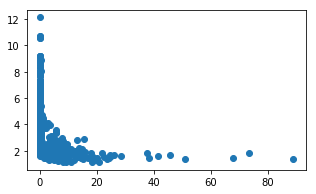

Moyenne de la  3 -eme variable est : 0.07
Moyenne de la  4 -eme variable est : 0.55


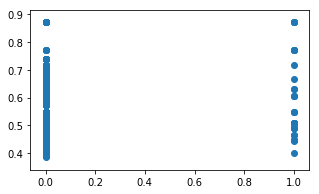

Moyenne de la  1 -eme variable est : 11.36
Moyenne de la  2 -eme variable est : 11.14


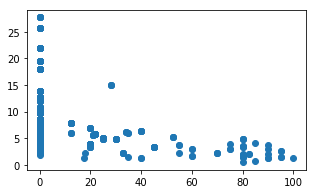

In [296]:
#Question 1.2.2
I = [0, 3, 1]
J = [7, 4, 2]
for k in range(len(I)):
    Xi, Xj = gen_variables(I[k], J[k], X)
    plt.figure (figsize=(5, 10))
    plt.subplot(3, 1, k+1)
    plt.scatter (Xi , Xj)
    plt.draw()
    plt.show()

### Commentaires : 

   Les variables "crim" et "empldist" semblent être corrélées. En effet, elles ont des moyennes assez proches et le tracer de la régression montre que le scatter n'est pas très loin de la première bisectrice.
De même, mais de manière plus vague, on soupçonne une corrélation entre les variables "chas" et "nox" qui restent proches en moyenne avec une régression qui fournit deux nuages de points de part et d'autre de la première bisectrice.
    Enfin, les variables "zone" et "indus" semblent corrélées, beaucoup moins bien que les variables "crim" et "empldist" car certaines données s'éloignent de la droite que fournit la régression linéaire et font douter de la corrélation.


In [297]:
#Question 2.1.1
# Régression linéaire
def predict(w, X):
    d = X.shape[0]
    U = np.ones((d,1))
    Xstacked = np.hstack((U,X))
    return Xstacked.dot(w)

In [298]:
#Question 2.1.2
def mse(yhat, y):
    y = y.reshape(y.shape[0], 1)
    yhat = yhat.reshape(yhat.shape[0], 1)
    z = yhat - y
    z = z.reshape((z.shape[0], 1))
    err = (z.T).dot(z)/z.shape[0]
    if err.shape == (1,1):
        return err[0, 0]
    return err


In [299]:
#Question 2.1.3
def regress(X, Y):
    d = X.shape[0]
    U = np.ones((d,1))
    Xs = np.hstack((U,X))
    Z = np.linalg.pinv((Xs.T).dot(Xs))
    w = Z.dot((Xs.T).dot(Y))
    return w

In [315]:
#Question 2.2
# Test sur les données artificielles :

def graphic_artificial(reg):
    # MSE en fonction du nombre d'expériences et du bruit
    nbex = np.linspace(50, 3000, 3000)
    eps = np.linspace(m.log(1), m.log(1.5), 100)
    MSE = []
    plt.figure(figsize=(8, 8))
    if (reg == 'regress'):
        for k in range(len(nbex)):
            (x, y) = gen_linear(a, b, 0.01, int(nbex[k]), d)
            w = regress(x, y)
            yhat = predict(w, x)
            MSE.append(mse(yhat, y))
        plt.plot(nbex, MSE)
        plt.xlabel("Nombre d'example de l'échantillon (nbex)")
        plt.ylabel('Erreur des moindres carrés de la prédiction')
        plt.title("Tracé de l'erreur des moindres carrés en fonction"\
                  +"du nombre d'examples")
        plt.draw()
        plt.show()
        
        MSE = []
        plt.figure(figsize=(8, 8))
        for j in range(len(eps)):
            (x, y) = gen_linear(a, b, eps[j], 1000, d)
            w = regress(x, y)
            yhat = predict(w, x)
            MSE.append(mse(yhat, y))
        plt.plot(eps, MSE)
        plt.xlabel("Variance epsilon")
        plt.ylabel('Erreur des moindres carrés de la prédiction')
        plt.title("Tracé de l'erreur des moindres carrés en fonction du bruit")
        plt.draw()
        plt.show()
    else:
        lmb = np.linspace(m.log(0.1), m.log(100), 3000)
        (x, y) = gen_linear(a.T, b, 0.01, 1000, d)
        for k in range(len(lmb)):
            w = ridge_regress(x, y, lmb[k])
            yhat = predict(w, x)
            MSE.append(mse(yhat, y))
        plt.plot(lmb, MSE)
        plt.xlabel('valeur de lambda (en log)')
        plt.ylabel('Erreur des moindres carrés de la prédiction')
        plt.title("Tracé de l'erreur des moindres carrés en fonction de lambda")
        plt.draw()
        plt.show()

# Ecart quadratique entre la prédiction et le vecteur optimal 
#au sens de moindres carrés
def QuadraticError(eps, reg = "regress"):
    quadErr = []
    plt.figure(figsize=(8, 8))
    if reg == "regress":
        nbex = np.linspace(100, 3000, 3000)
        for k in range(len(nbex)):
            (x, y) = gen_linear(a, b, eps, int(nbex[k]), d)
            w = regress(x, y)
            yhat = predict(w, x)
            c = np.concatenate((np.array([b]), a))
            c = c.reshape((c.shape[0], 1))
            quadErr.append(((w-c).T).dot((w-c))[0,0])
        plt.plot(nbex, quadErr)
        plt.xlabel("Nombre d'example de l'échantillon (nbex)")
        plt.ylabel('Erreur quadratique de la \n prédiction du vecteur "\
        +"de régression en log')
        plt.title("Tracé de l'erreur quadratique en fonction du nombre d'examples")
    else:
        lmb = np.linspace(m.log(0.0001), m.log(1000), 4000)
        for k in range(len(lmb)):
            (x, y) = gen_linear(a, b, eps, 1500, d)
            w = ridge_regress(x, y, lmb[k])
            c = np.concatenate((np.array([b]), a))
            c = c.reshape((c.shape[0], 1))
            quadErr.append(((w-c).T).dot((w-c))[0,0])
        plt.plot(lmb, quadErr)
        plt.xlabel("valeur de lambda (en log)")
        plt.ylabel('Erreur quadratique de la \n prédiction du vecteur de régression')
    plt.draw()
    plt.show()

# En introduisant une dimension aléatoire :
def fluctuation():
    a = np.array([1, 1, 1])
    b = 5.
    d = 3
    (x, y) = gen_linear(a, b, 0.001, 1000, d)
    alea = np.random.uniform(-5, 5, (x.shape[0], 1))
    x = np.hstack((x, alea))
    w = regress(x, y)
    print("Erreur des moindres carrés ")
    print("mse = ", mse(predict(w, x), y))
    print("w = ", w.T)

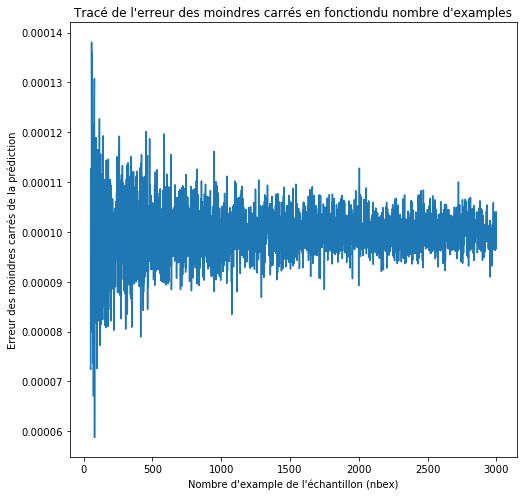

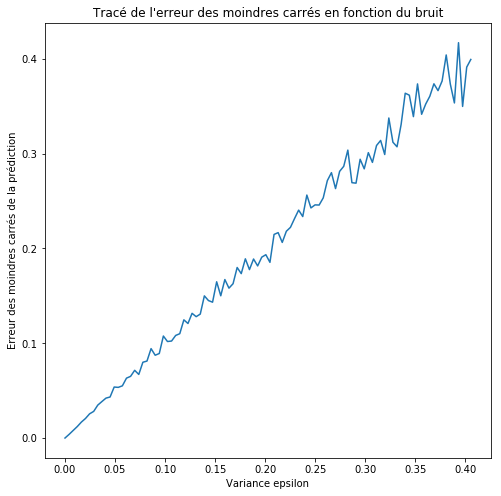

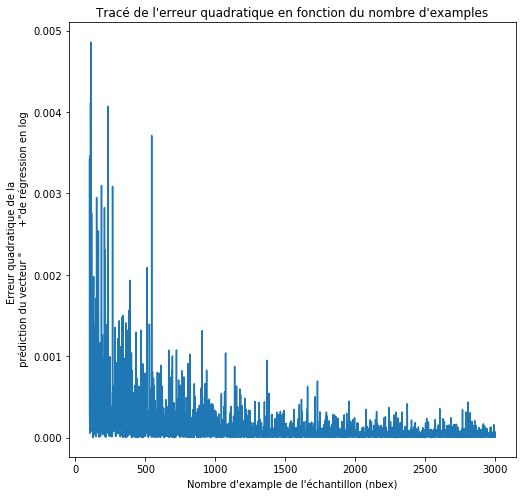

Erreur des moindres carrés 
mse =  0.00101183248174
w =  [[  4.99944526e+00   9.99602588e-01   9.99746834e-01   9.99467156e-01
    4.78387522e-04]]


In [316]:
graphic_artificial('regress')
QuadraticError(0.1)
fluctuation()

### Commentaires :

On remarque tout d'abord que l'erreur quadratique au sens des moindres carrés diminue en fonction du nombre d'examples (de données) de l'échantillon qu'on détient. En effet, au bout de 1000 examples de données sur les variables on trouve une erreur MSE relativement faible.
     De plus, cette erreur des moindres carrés fluctue d'autant plus que le bruit (la variance epsilon) est grande. Ce qui est intuitif; car plus les données qu'on détient sont faussées par un bruit, plus il est difficile de reconstituer le vecteur de départ.
     Enfin, l'erreur quadratique du vecteur à prédire et du vecteur retrouver par la régression (vecteur d'apprentissage w) diminue également avec le nombre d'examples de l'échantillon car on se rapproche de mieux en mieux de l'optimum en réduisant l'erreur lors de la minimisation de l'erreur des moindres carrés. Cet optimum étant le vecteur à prédire.
     
  Lorsqu'on rajoute une dimension aléatoire, on remarque que celle si obtient un coefficient de pondération très faible et ne fausse pas trop l'analyse prédictive, le coefficient attribué à la variable fictive aléatoire étant proche de zéro.

## Question 2.3.1


Interprétation des poids des différentes variables :

   Les poids des variables rendent compte de la corrélation existante entre les deux variables $X_i$ et $X_j$ considérées. Finalement, un coefficient $w_k$ de $1$ voudrait dire que la k -ieme variable de X est corrélée avec Y.
    Donc plus le poids est grand plus la régression fournit un lien entre les variables dont on possède une base de donnée X.
    

In [302]:
# Question 2.3.2 :

# Pour des données réelles :
def multiply_data(coef=10.):
    X, Xshaped = read_file(fn)
    nbex = 1000
    eps = 0.1
    d = X.shape[1]
    a = np.ones((1, d))
    Y = Xshaped
    w0 = regress(X, Y)
    X[:,2] *= coef
    w = regress(X, Y)
    print("Le vecteur d'apprentissage sans multiplication est : ")
    print("w_initial = ", w0.T)
    print("\n")
    print("Après multiplication par 10, le vecteur prédit est : ")
    print("w = ", w.T)
    # La variable multipliée par 10 à un poids diviser par 10.
    yhat0 = predict(w0, X)
    yhat = predict(w, X)
    e0 = mse(Y, yhat0)
    e = mse(Y, yhat)
    print("\n")
    print("L'erreur des moindres carrés pour le vecteur sans multiplication est :")
    print("mse = ", e0)
    print("L'erreur des moindres carrés pour le vecteur avec multiplication est : ")
    print("mse = ", e)
    
multiply_data()
    

Le vecteur d'apprentissage sans multiplication est : 
w_initial =  [  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e+00  -1.77666112e+01   3.80986521e+00   6.92224641e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]


Après multiplication par 10, le vecteur prédit est : 
w =  [  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-03
   2.68673382e+00  -1.77666112e+01   3.80986521e+00   6.92224641e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]


L'erreur des moindres carrés pour le vecteur sans multiplication est :
mse =  27.7490298847
L'erreur des moindres carrés pour le vecteur avec multiplication est : 
mse =  21.8948311817


### Commentaires :
    
  On remarque donc que la multiplication d'une variable dans notre tableau de données $X$ baisse d'un coefficient de $0.1$ (inversement proportionnel au coefficient multiplicatif) la crédibilité de cette variable. Donc on obtient un vecteur proche du vecteur à prédire sauf pour la colonne relative à la variable multipliée.
    Quant à l'erreur des moindres carrés, on remarque qu'elle ne varie pas très significativement. En effet, elle reste sur le même ordre de grandeur.
    
   Pour le pré-traitement qu'il faudrait effectuer au préalable, il s'agit de centrer et réduire les variables données pour assurer une interprétation plus fiable aux poids d'apprentissage. En effet, les poids ne peuvent être comparables pour deux variables très différentes en moyenne et/ou en écart type.
    

# 3. Ridge Régression

## Question 3.1

Le vecteur prédit w pourrait donner de trop grands poids sur certaines variables lors de l'apprentissage (sur-apprentissage) et donc avoir une norme conséquente. Ainsi, on va dans la suite considéré un terme de pondération qui minimisera la norme de w selon un coefficiant $\lambda$. On appelle cette amélioration la Ridge Régression.
Cela n'arrive pas forcément souvent, donc sur plusieurs régressions, nous aurons les mêmes résultats pour les deux types de régression avec ou sans considération de la norme de w.

In [303]:
# Ridge régression
def ridge_regress(X, Y, lmb):
    d = X.shape[0]
    U = np.ones((d, 1))
    Xs = np.hstack((U, X))
    I = np.ones((Xs.shape[1], Xs.shape[1]))
    Z = np.linalg.pinv((Xs.T).dot(Xs) + lmb * I)
    w = Z.dot((Xs.T).dot(Y))
    return w


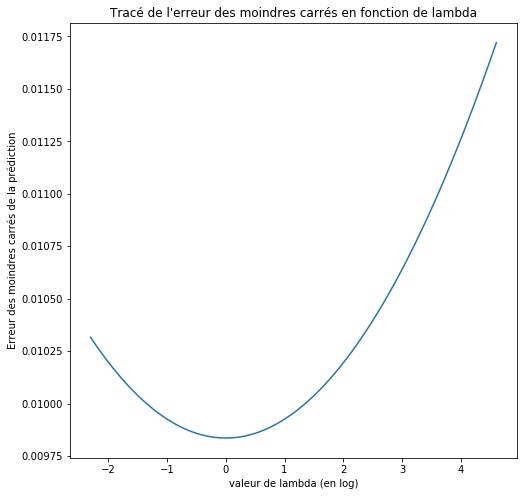

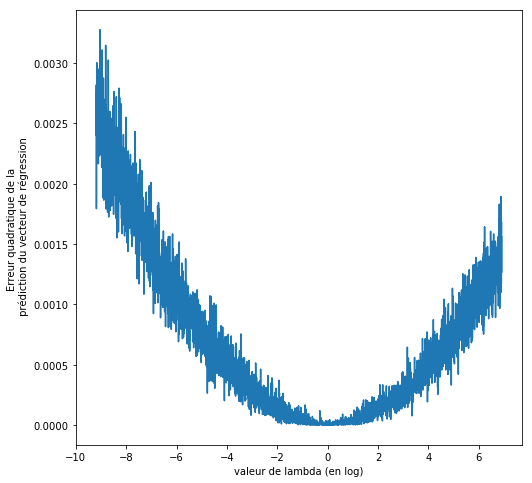

In [304]:
# Question 3.2

#Données artificielles :
graphic_artificial('ridge_regress')
QuadraticError(0.01,"ridge_regress")

### Commentaires :

   Pour l'erreur des moindres carrés de la prédiction, on remarque dans un premier temps que pour des valeurs très grandes de $\lambda$ (sous-apprentissage) l'erreur au sens des moindres carrés augmente significativement car l'apprentissage est faussé par une trop grande pondération de la norme de w. Néanmoins, celle ci décroit dans un premier temps et possède donc un minimum en $\lambda$ . Enfin, on peut donc trouver un coefficient $\lambda$ qui puisse minimiser l'erreur des moindres carrés et donc combiner à la fois le coût de l'apprentissage et celui des coefficients du vecteur d'apprentissage.
    Quant à l'erreur quadratique, on remarque que celle ci suit l'erreur des moindres carrés bien qu'elle fluctue assez fortement lorsqu'on s'éloigne du lambda critique $\lambda_{*}$ la minimisant.
    

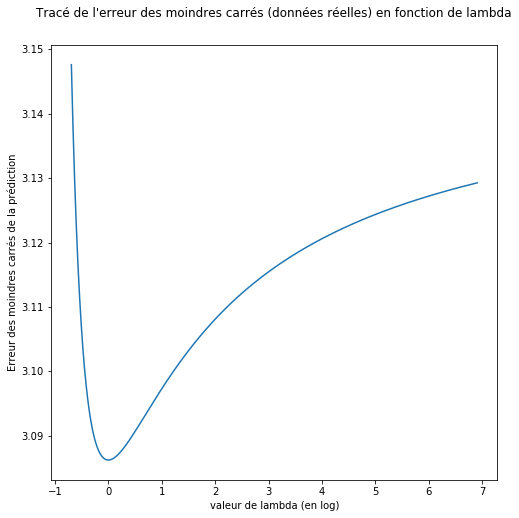

In [305]:
# Question 3.3

#Données réelles :
def graphic_real():
    global fn
    X, Xshaped = read_file(fn)
    plt.figure(figsize = (8, 8))
    # MSE :
    MSE = []
    list_lmb = np.linspace(m.log(0.5), m.log(1000), 1000)
    for k in range(len(list_lmb)):
        w = ridge_regress(X, Xshaped, list_lmb[k])
        yhat = predict(w, X)
        MSE.append(m.log(mse(yhat, Xshaped)))
    plt.plot(list_lmb, MSE)
    plt.xlabel('valeur de lambda (en log)')
    plt.ylabel('Erreur des moindres carrés de la prédiction')
    plt.title("Tracé de l'erreur des moindres carrés (données réelles) "\
              +"en fonction de lambda", y = 1.05)
    plt.draw()
    plt.show()

graphic_real()

### Commentaires :

   De la même manière que pour les données artificielles, on remarque que l'erreur augmente pour des grandes valeurs de $\lambda$ et possède un minimum en $\lambda$.

# 4. LASSO

In [306]:
# Question 4.1
# LASSO

def compareLasso(list_lmb):
    plt.figure(figsize=(10,8))
    X, Xshaped = read_file(fn)
    Y = Xshaped
    listWLasso = []
    listWRidge = []
    for i in range(len(list_lmb)):
        clfLasso = ln.Lasso(alpha=list_lmb[i])
        clfLasso.fit(X, Y)
        w = clfLasso.coef_
        w = w.reshape((w.shape[0], 1))
        listWLasso.append(w)
        w_ridge = ridge_regress(X, Y, list_lmb[i])
        listWRidge.append(w_ridge)
        # On stocke les valeurs des vecteurs d'apprentissage w pour 
        #chacune des méthodes Lasso et Ridge Regression.
    listWLasso = np.array([w for w in listWLasso])
    listWRidge = np.array([w for w in listWRidge])
    for i in range(w.shape[0]):
        ord_y = (listWLasso[:,i].T).reshape((list_lmb.size, 1))
        plt.plot(list_lmb, ord_y, label="coefficient w"+str(i))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('lambda')
    plt.ylabel('coefficients de w')
    plt.title('Tracé des composantes de w en fonction de lambda (LASSO)')
    plt.draw()
    plt.show()
    plt.figure(figsize=(10, 8))
    for i in range(w.shape[0]):
        ord_y = (listWRidge[:,i].T).reshape((list_lmb.size, 1))
        plt.plot(list_lmb, ord_y, ".", label="coefficient w"+str(i))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('lambda')
    plt.ylabel('coefficients de w')
    plt.title('Tracé des composantes de w en fonction de lambda (Ridge Regression)')
    plt.draw()
    plt.show()   

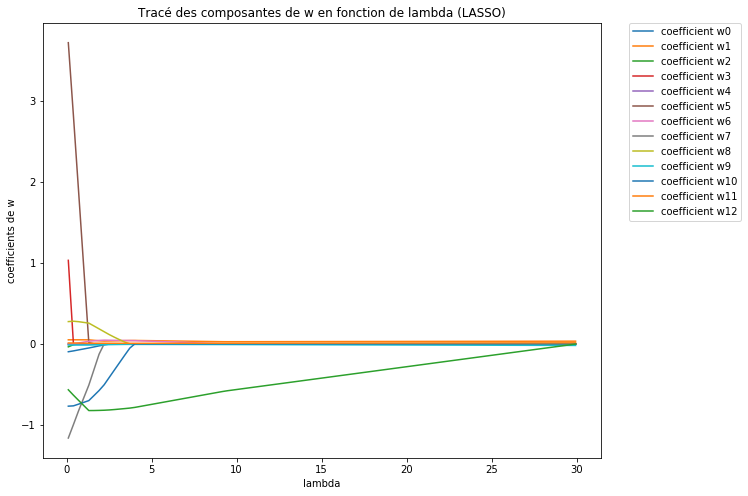

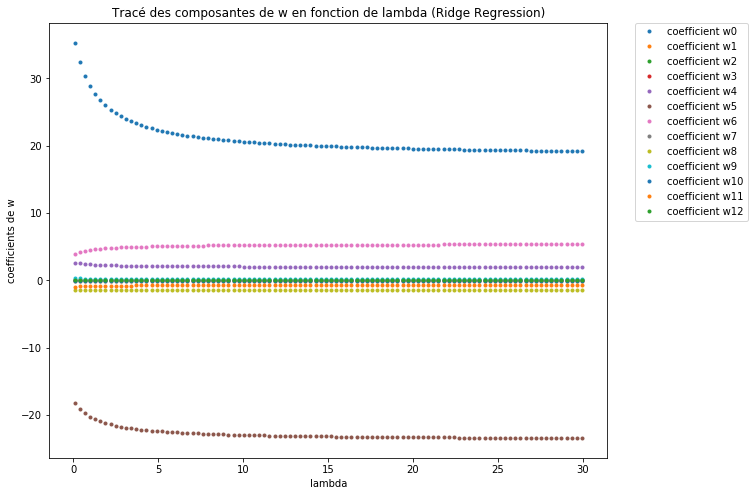

In [307]:
list_lmb = np.linspace(m.log(1.1), m.log(10000000000000), 100)
compareLasso(list_lmb)

### Commentaires :

   On remarque déjà les différences suivantes entre la Ridge Regression et LASSO : 
- La Ridge Regression inclue toutes (ou aucune) des variables du modèle. D'où l'avantage de la Ridge du rétrécissement des coefficients et la réduction de la compléxité du modèle.
- LASSO, en plus du rétrécissement des coefficients et de la pondération qu'elle effectue, permet la sélection des variables. En effet, certains coefficients de LASSO sont pondérés à 0 et donc sont excules. 
    
   De plus, on peut interpréter le modèle LASSO par la survie d'une certaine variable à la contrainte de rétrécissement des coefficients. Dans la courbe ci-dessus, on voit la courbe verte décroître avant d'atteindre 0 et la variable reliée à cette courbe ci survit donc plus longtemps que les autres (qu'on ne voit pas sur le graphique) ou encore celles qui sont directement pondérées à 0. Finalement, on peut mesurer également l'importance d'un coefficient et donc d'une variable, dans notre modèle de régression linéaire. La courbe rouge (ou la mauve) pour LASSO par exemple, "meurt" vite face à la contrainte de rétrécissement des coefficients et donc peut être jugée inintéressante pour l'apprentissage.


In [308]:
# Méthode hybride :

def hybrid_regress(X, Y, lmb):
    clfLasso = ln.Lasso(alpha=lmb)
    clfLasso.fit(X, Y)
    w = clfLasso.coef_
    w = w.reshape((w.shape[0], 1))
    list_var = [i for i in range(len(w[:,0])) if w[i, 0] != 0.]
    return np.array(list_var)

def subX(X, Y, lmb):
    list_var = hybrid_regress(X, Y, lmb)
    new_X = np.array([X[:, list_var[0]]]).T
    for i in list_var:
        if i != list_var[0]:
            Xi = X[:,i].reshape((X[:,i].shape[0], 1))
            new_X = np.concatenate((new_X, Xi), axis = 1)
    return new_X


def hybrid(X, Y, lmb):
    new_X = subX(X, Y, lmb)
    d = new_X.shape[1]
    w_reg = ridge_regress(new_X, Y, lmb)
    return w_reg
    
hybrid_regress(X, Xshaped, m.log(5))
w = hybrid(X, Xshaped, m.log(5))
print("w_hybrid = \n", w)

def compare_hybrid(X, Y, list_lmb = [m.log(i) for i in \
                                     [5, 7, 10, 15, 20, 30, 1000]]):
    MSE_hybrid = []
    MSE_ridge = []
    plt.figure(figsize=(7, 7))
    for l in list_lmb:
        w_hybrid = hybrid(X, Y, l)
        new_X = subX(X, Y, l)
        yhat = predict(w_hybrid, new_X)
        MSE_hybrid.append(mse(yhat, Y))
        w_ridge = ridge_regress(X, Y, l)
        MSE_ridge.append(mse(predict(w_ridge, X), Y))
    plt.plot(list_lmb, MSE_hybrid, color='blue', label="Hybrid Regression")
    plt.plot(list_lmb, MSE_ridge, color='red', label="Ridge Regression")
    plt.xlabel('lambda')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.draw()
    plt.show()

w_hybrid = 
 [  3.94964565e+01  -1.03499962e-01   9.51936086e-02   3.95788263e-02
  -1.07494016e+00   3.04540213e-01  -1.58489867e-02  -4.07491367e-01
   1.51678793e-02  -8.49825211e-01]


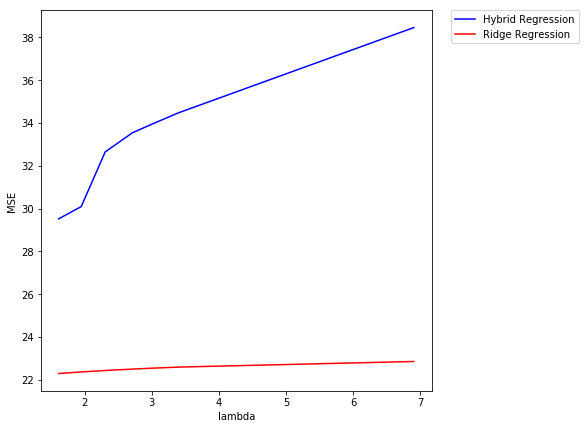

In [309]:
w = compare_hybrid(X, Xshaped)


### Remarque :

   Je m'attendais à un autre résultat : En effet, la Hybrid Regression combine les deux avantages d'une Ridge Regression et de la méthode LASSO et donc devrait fournir une erreur des moindres carrés plus faible que la Ridge Regression.